In [1]:
from bayestme import data

stdata = data.SpatialExpressionDataset.read_spaceranger("../A1_spaceranger_output")

In [2]:
stdata.gene_names

array(['rerg', 'si:ch73-252i11.1', 'syn3', ..., 'CABZ01079745.1',
       'BRAFhuman', 'EGFP'], dtype='<U22')

Plot saved as ./BRAFhuman_raw_counts.png


/Users/jquinn/opt/anaconda3/envs/bayes_tme2/lib/python3.9/site-packages/bayestme-0.1.0-py3.9.egg/bayestme/plotting.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


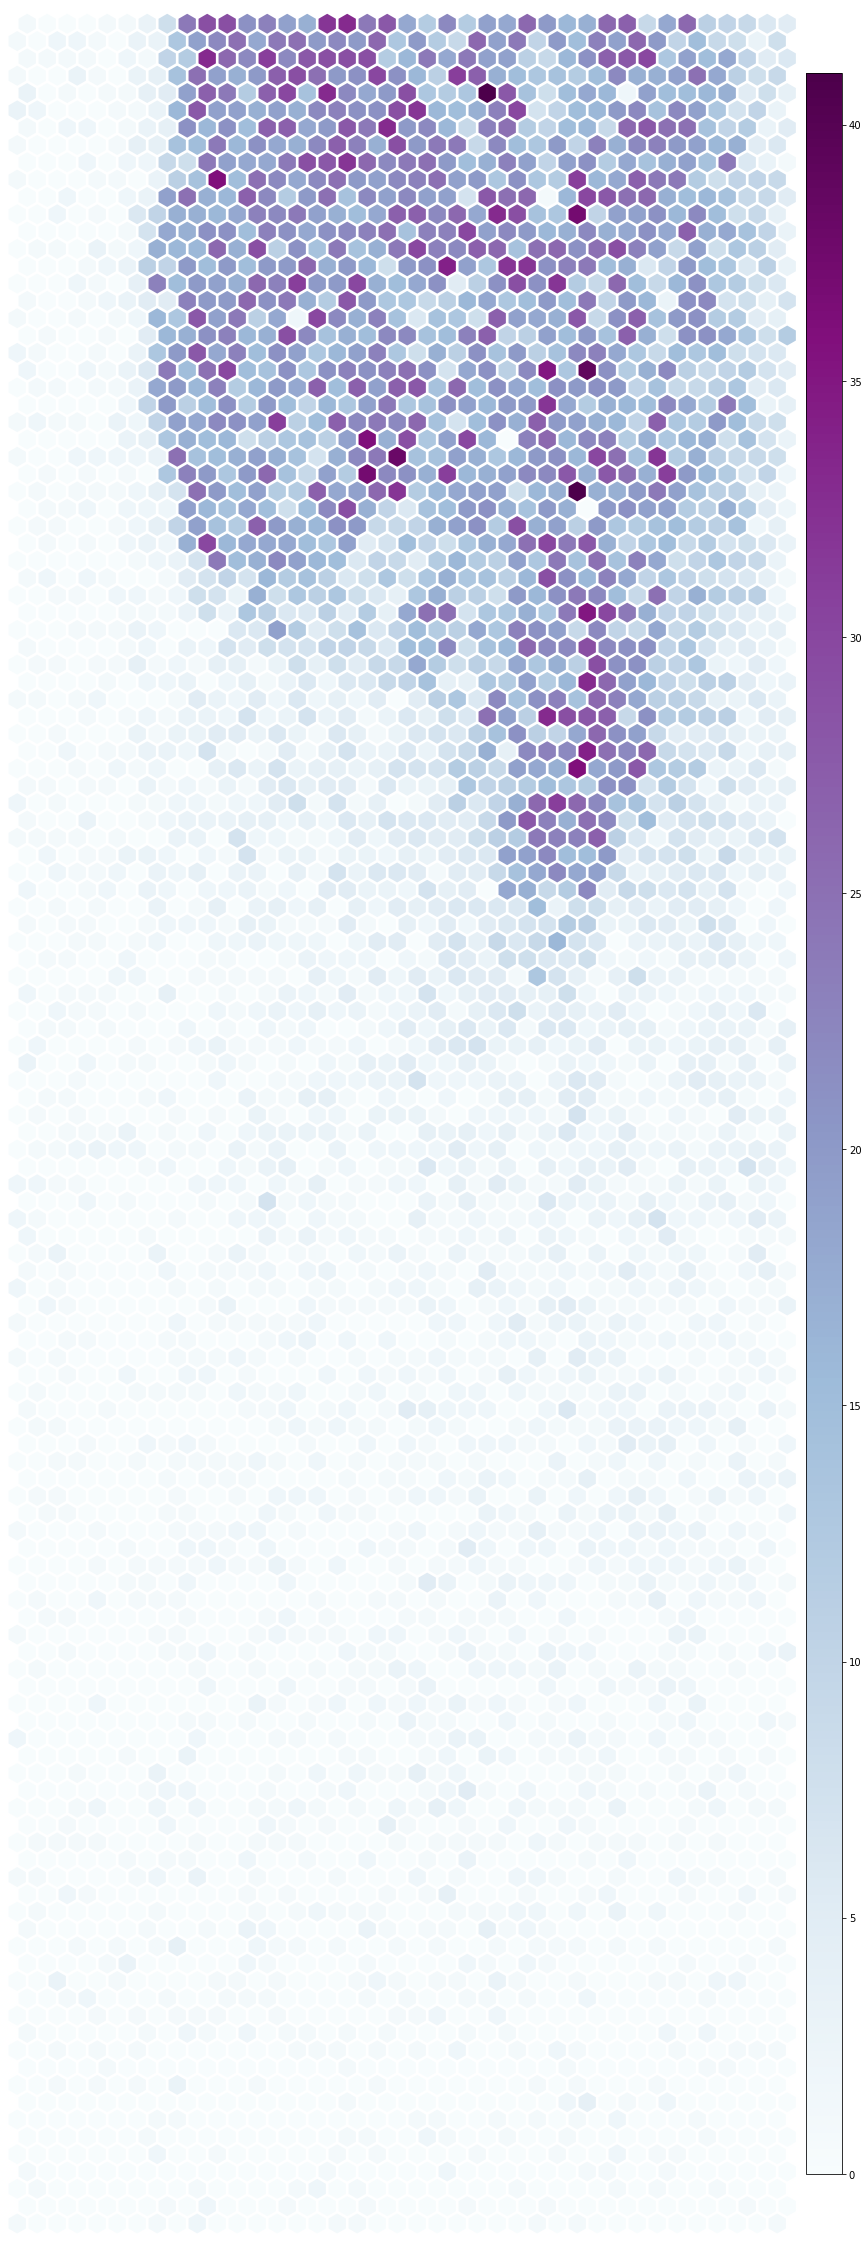

In [8]:
from bayestme import plotting
from IPython.display import Image

plotting.plot_gene_raw_counts(stdata=stdata, gene='BRAFhuman', output_dir='.', output_format='png')


Image('BRAFhuman_raw_counts.png')

In [9]:
from bayestme import gene_filtering

stddev_filtered = gene_filtering.select_top_genes_by_standard_deviation(
    stdata, n_gene=1000)

spot_threshold_filtered = gene_filtering.filter_genes_by_spot_threshold(
    stddev_filtered, spot_threshold=0.95)

stdata_filtered = gene_filtering.filter_ribosome_genes(spot_threshold_filtered)

In [10]:
print('{}/{} genes selected'.format(len(stdata_filtered.gene_names), len(stdata.gene_names)))

873/32268 genes selected


In [11]:
from bayestme import bleeding_correction

cleaned_dataset, bleed_correction_result = bleeding_correction.clean_bleed(
    dataset=stdata_filtered,
    n_top=5,
    local_weight=None,
    max_steps=2
)

Fitting basis functions to first 5 genes

Step 1/2



KeyboardInterrupt

